In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the wine dataset from sklearn
from sklearn.datasets import load_wine
vine = load_wine()
df = pd.DataFrame(vine.data, columns=vine.feature_names)
df.head()
df.shape
df.isnull().sum().sum()
X1 = df
y1 = pd.Series(vine.target)

In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1,test_size=0.20,shuffle=True, random_state=2)

In [16]:
# Normalize Data
sc = StandardScaler()
scaler = sc.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [17]:
# Build the model
from keras.models import Sequential

ann = Sequential()

In [18]:
# Add the input layer, hidden layers and output layer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

ann.add(InputLayer(input_shape=(13,)))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(14, activation='relu'))
ann.add(Dense(13, activation='softmax'))

In [19]:
# Compile and train the model
from tensorflow.keras import optimizers

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

clf = ann.fit(X2_train, y2_train, batch_size=8, verbose=2, epochs=10, validation_data=(X2_test, y2_test))

Epoch 1/10
18/18 - 1s - loss: 1.4004 - accuracy: 0.5704 - val_loss: 0.4562 - val_accuracy: 0.9167 - 668ms/epoch - 37ms/step
Epoch 2/10
18/18 - 0s - loss: 0.1774 - accuracy: 0.9859 - val_loss: 0.1492 - val_accuracy: 0.9167 - 46ms/epoch - 3ms/step
Epoch 3/10
18/18 - 0s - loss: 0.0345 - accuracy: 0.9859 - val_loss: 0.0660 - val_accuracy: 0.9722 - 50ms/epoch - 3ms/step
Epoch 4/10
18/18 - 0s - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9722 - 55ms/epoch - 3ms/step
Epoch 5/10
18/18 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9722 - 51ms/epoch - 3ms/step
Epoch 6/10
18/18 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 0.9722 - 50ms/epoch - 3ms/step
Epoch 7/10
18/18 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9444 - 55ms/epoch - 3ms/step
Epoch 8/10
18/18 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9722 - 76ms/epoch - 4ms/step
Epoch 9/10
18/18 - 0s 

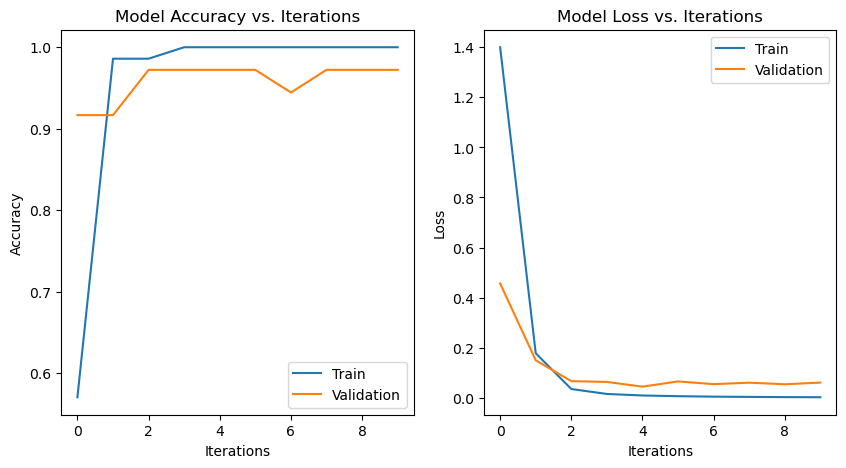

In [20]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(clf.history['accuracy'])
axes[0].plot(clf.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(clf.history['loss'])
axes[1].plot(clf.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [21]:
# Evaluate the model
print(ann.evaluate(X2_test, y2_test))

2/2 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9722
[0.060324158519506454, 0.9722222089767456]
